In [1]:
import pandas as pd
import numpy as np
import csv
import platform
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,KBinsDiscretizer
import statistics
from scipy.stats import pearsonr
import seaborn as sns

In [27]:
if platform.system() == 'Darwin' or platform.system() == 'Linux':
    _dir = 'Processed_data/'
else:
    _dir = 'Processed_data\\'
Files = [join(_dir, f) for f in listdir(_dir) if isfile(join(_dir, f))]

In [28]:
_files = []
for file in Files:
    _files.append(file.split('/')[1].split('_final')[0])

# RQ1

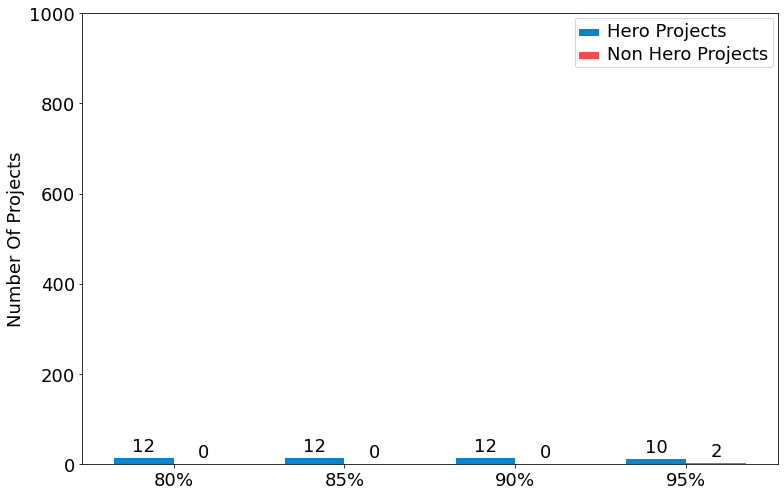

In [30]:
df = pd.read_csv('hero_list.csv')
df = df[df.repo_name.isin(_files)]


df = df[df['heros_80'] != 0]
df_80 = df.heros_80.values.tolist()
df_85 = df.heros_85.values.tolist()
df_90 = df.heros_90.values.tolist()
df_95 = df.heros_95.values.tolist()



labels = ['80%', '85%', '90%', '95%']
true = [df_80.count(True), df_85.count(True), df_90.count(True), df_95.count(True)]
false = [df_80.count(False), df_85.count(False), df_90.count(False), df_95.count(False)]
x = np.arange(len(labels))  # the label locations
y = [0,200,400,600,800,1000]
width = 0.35  # the width of the bars

fig = plt.figure(num=None, figsize = (11,7), facecolor='w', edgecolor='k')
ax = fig.subplots()
rects1 = ax.bar(x - width/2, true, width, label='Hero Projects',color=sns.xkcd_rgb["cerulean"])
rects2 = ax.bar(x + width/2, false, width, label='Non Hero Projects',color=sns.xkcd_rgb["light red"])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticks(y)
ax.set_yticklabels(y,fontsize=18)
ax.set_ylabel('Number Of Projects',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=18)



legend=ax.legend()
legend.get_title().set_fontsize('18') #legend 'Title' fontsize
plt.setp(plt.gca().get_legend().get_texts(), fontsize='18')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=18)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
# fig.savefig('RQ1_Code.png')

# RQ2

(16, 13)
(12, 4)
(10, 4)


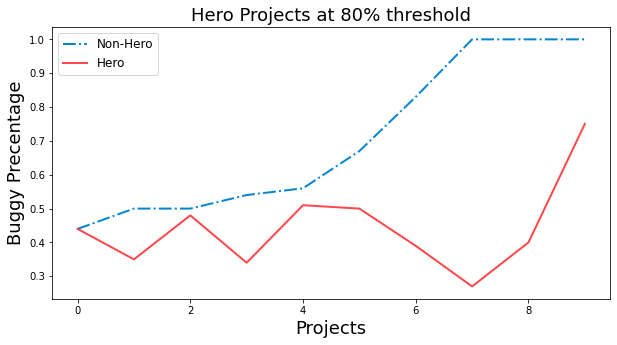

(12, 4)
(7, 4)


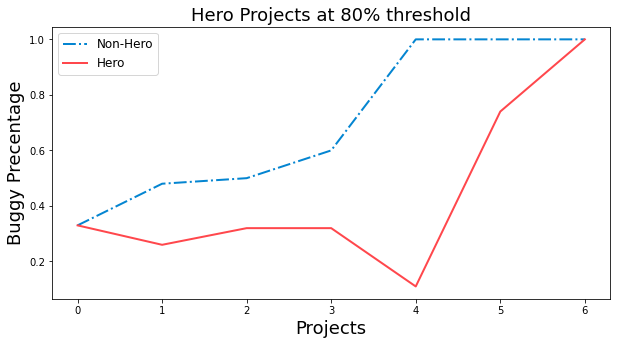

(16, 13)
(12, 4)
(11, 4)


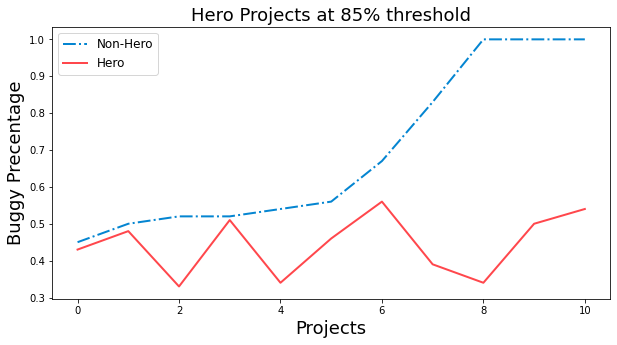

(12, 4)
(8, 4)


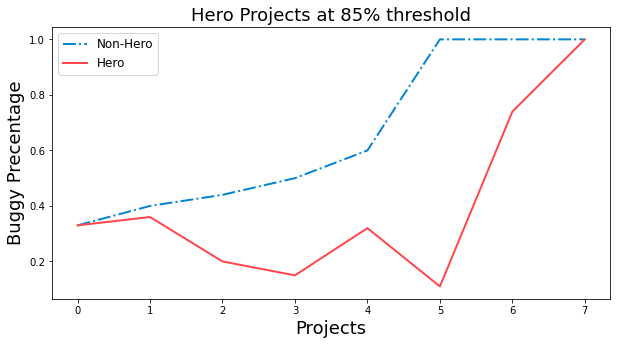

(16, 13)
(12, 4)
(9, 4)


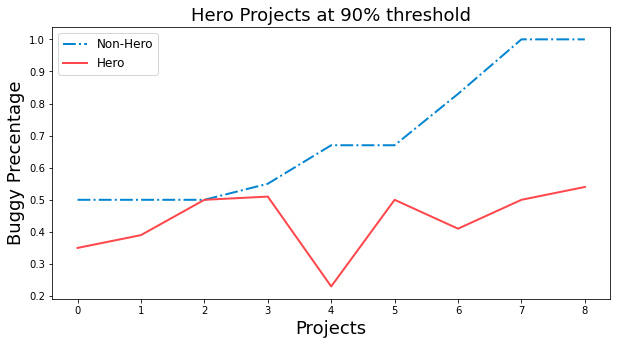

(12, 4)
(8, 4)


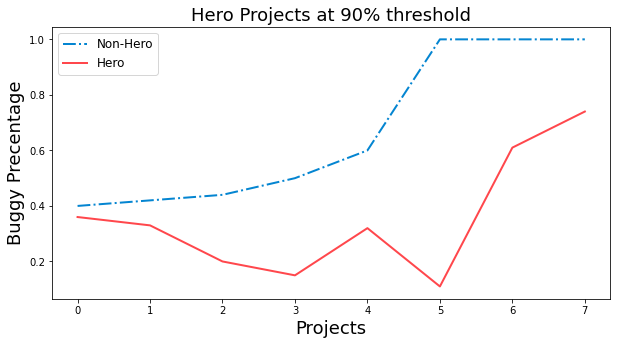

(13, 13)
(10, 4)
(8, 4)


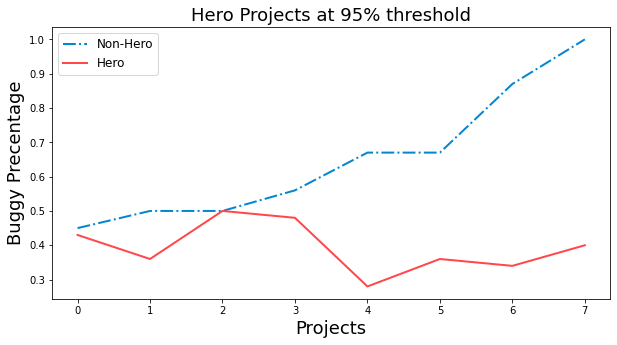

(10, 4)
(7, 4)


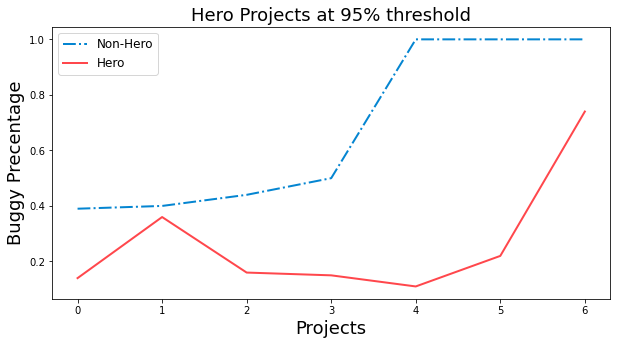

In [32]:
percentiles = [80, 85, 90, 95]

for percentile in percentiles:
    df_heros = pd.read_csv('hero_list.csv')
    df_heros = df_heros[df_heros['heros_' + str(percentile)] == True]
    print(df_heros.shape)
    df = pd.read_csv('results/Result_data_team_joined_' + str(percentile) + '.csv')
    project_name = []
    for i in range(df.shape[0]):
        project_name.append(df.iloc[i,0].split('/')[1].split('_final')[0])
        #print(df.iloc[i,0].split('/')[1].split('_final')[0])
    df['repo_name'] = project_name
    df = df[df['repo_name'].isin(df_heros.repo_name.values.tolist())]
    df_c = df.drop(labels=['project','s_size','s_experienced','s_inexperienced'],axis = 1)
    df_s = df.drop(labels=['project','c_size','c_experienced','c_inexperienced'],axis = 1)
    fig = plt.figure(num=None, figsize = (10,5), facecolor='w', edgecolor='k')
    df_c.sort_values(by=['c_inexperienced','c_experienced'],inplace=True)
    indexNames = df_c[ df_c['c_inexperienced'] > 1 ].index
    df_c.drop(indexNames , inplace=True)
    indexNames = df_c[ df_c['c_experienced'] > 1 ].index
    df_c.drop(indexNames , inplace=True)
    print(df_c.shape)
    indexNames = df_c[ df_c['c_experienced'] > df_c['c_inexperienced']].index
    df_c.drop(indexNames , inplace=True)
    print(df_c.shape)
    df_c.dropna(inplace=True)
    df_c['order'] = list(range(df_c.shape[0]))
    plt.plot( 'order', 'c_inexperienced', data=df_c, marker='', color=sns.xkcd_rgb["cerulean"], linewidth=2, linestyle='-.', label="Non-Hero")
    plt.plot( 'order', 'c_experienced', data=df_c, marker='', color=sns.xkcd_rgb["light red"], linewidth=2, linestyle='-', label="Hero")
    plt.xlabel('Projects',fontsize=18)
    plt.ylabel('Buggy Precentage',fontsize=18)
    plt.title('Hero Projects at ' + str(percentile) + '% threshold',fontsize=18)
    plt.legend(fontsize=12)
    plt.show()
    fig = plt.figure(num=None, figsize = (10,5), facecolor='w', edgecolor='k')
    df_s.sort_values(by=['s_inexperienced','s_experienced'],inplace=True)
    indexNames = df_s[ df_s['s_inexperienced'] > 1 ].index
    df_s.drop(indexNames , inplace=True)
    indexNames = df_s[ df_s['s_experienced'] > 1 ].index
    df_s.drop(indexNames , inplace=True)
    print(df_s.shape)
    indexNames = df_s[ df_s['s_experienced'] > df_s['s_inexperienced'] ].index
    df_s.drop(indexNames , inplace=True)
    print(df_s.shape)
    df_s.dropna(inplace=True)
    df_s['order'] = list(range(df_s.shape[0]))
    plt.plot( 'order', 's_inexperienced', data=df_s, marker='', color=sns.xkcd_rgb["cerulean"], linewidth=2, linestyle='-.', label="Non-Hero")
    plt.plot( 'order', 's_experienced', data=df_s, marker='', color=sns.xkcd_rgb["light red"], linewidth=2, linestyle='-', label="Hero")
    plt.xlabel('Projects',fontsize=18)
    plt.ylabel('Buggy Precentage',fontsize=18)
    plt.title('Hero Projects at ' + str(percentile) + '% threshold',fontsize=18)
    plt.legend(fontsize=12)
    plt.show()